# Homework 1: Fashion Data
## Bao Ngoc Dinh
## Text Analytics 5:45PM

In [42]:
#import
import numpy as np
import pandas as pd
import nltk
from nltk import FreqDist
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

<p>Load the dataframe</p>

In [24]:
df=pd.read_csv('fashion data.csv')


In [59]:
df

,year,season,brand,author of review,location,time,review text
0,2016,Spring,A Dtacher,Kristin Anderson,NEW YORK,"September 13, 2015",Detachment was the word of the day at A Dtache...
1,2016,Spring,A.F. Vandevorst,Luke Leitch,PARIS,"October 1, 2015",You heard this collection coming long before y...
2,2016,Spring,A.L.C.,Kristin Anderson,NEW YORK,"September 21, 2015",August saw the announcement of big news for A....
3,2016,Spring,A.P.C.,Nicole Phelps,PARIS,"October 3, 2015","They call me the king of basics, Jean Touitou ..."
4,2016,Spring,A.W.A.K.E.,Maya Singer,NEW YORK,"October 21, 2015",Natalia Alaverdian is a designer with a lot of...
...,...,...,...,...,...,...,...
429,2016,Spring,Zo Jordan,Maya Singer,LONDON,"September 19, 2015","Water, water, everywhere, / nor any drop to dr..."
430,2016,Spring,Zuhair Murad,Amy Verner,PARIS,"October 4, 2015","From a new Paris showroom, Zuhair Murad came a..."
431,2016,Spring,1205,Luke Leitch,LONDON,"September 19, 2015",Fashion and Instagram are such (often sacchari...
432,2016,Spring,3.1 Phillip Lim,Maya Singer,NEW YORK,"September 14, 2015",Let other New York City fashion designers toas...


<p>Concatenate all the review texts</p>

In [25]:
a = df['review text'].str.cat(sep=' ')

<p>Tokenize the reviews</p>

In [26]:
tokens = nltk.tokenize.word_tokenize(a)

## 1) Use a simple bag-of-words approach

<p>Some pre-processing</p>

In [27]:
words1 = [w.lower() for w in tokens]
words2=[w for w in words1 if w.isalpha()]
freq=FreqDist(words2)
#sort the frequency list in descending order
sorted_freq = sorted(freq.items(),key = lambda k:k[1], reverse = True)
sorted_freq

[('the', 6451),
 ('a', 4197),
 ('and', 3708),
 ('of', 3610),
 ('to', 2531),
 ('in', 2357),
 ('with', 1584),
 ('that', 1562),
 ('was', 1410),
 ('for', 1109),
 ('on', 1029),
 ('as', 931),
 ('it', 876),
 ('were', 697),
 ('her', 692),
 ('is', 684),
 ('but', 679),
 ('this', 662),
 ('his', 649),
 ('at', 610),
 ('from', 556),
 ('an', 539),
 ('collection', 489),
 ('by', 437),
 ('he', 423),
 ('be', 409),
 ('its', 406),
 ('or', 406),
 ('she', 394),
 ('their', 392),
 ('all', 390),
 ('there', 381),
 ('more', 367),
 ('new', 357),
 ('one', 354),
 ('which', 339),
 ('dresses', 328),
 ('like', 313),
 ('they', 306),
 ('has', 305),
 ('into', 300),
 ('show', 295),
 ('not', 294),
 ('have', 285),
 ('out', 284),
 ('dress', 283),
 ('up', 274),
 ('are', 264),
 ('so', 253),
 ('you', 246),
 ('had', 242),
 ('spring', 241),
 ('designer', 232),
 ('who', 232),
 ('about', 230),
 ('clothes', 226),
 ('said', 222),
 ('season', 221),
 ('also', 221),
 ('been', 219),
 ('some', 219),
 ('what', 211),
 ('fashion', 205),
 ('wh

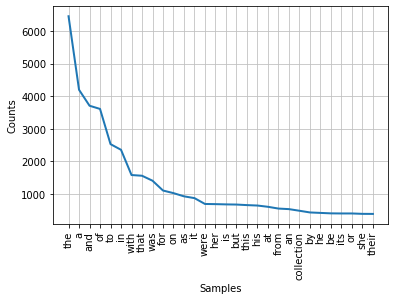

In [28]:
freq.plot(30)

<p>Wordcloud for our simple BOW approach</p>

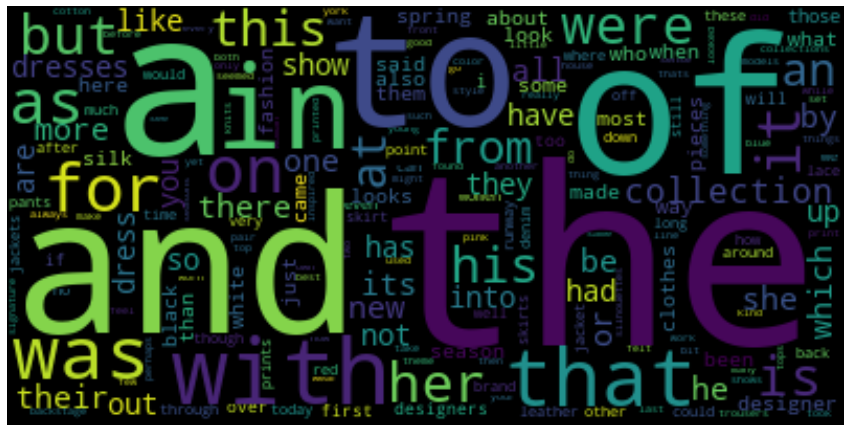

In [29]:
filter_words = dict([(m, n) for m, n in freq.items()])
 
wcloud = WordCloud().generate_from_frequencies(filter_words)
 
# Plotting the wordcloud
plt.figure(figsize=(15,8))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

<p> With the simple Bag-of-words approach, we could not extract much info. Words like 'the', 'a','is' do not provide us with trends or useful information but they are often repeated in the English language. This wordcloud and freqdist generated are rather inconclusive.</p>

## 2) Use a bag-of-words approach with stemming and stop words removal 

In [30]:
#import stopwords
from nltk.corpus import stopwords

stopwords = stopwords.words('english') #use the NLTK stopwords

In [31]:
#preprocessing
words_nostopwords = [w for w in words2 if w not in stopwords]

In [32]:
#Use Porter Stemmer 
porter = nltk.PorterStemmer()
stem1 = [porter.stem(w) for w in words_nostopwords]

#Get the frequency distribution 
freq1 = FreqDist(stem1)
#Sort the result
sorted_freq1 = sorted(freq1.items(),key = lambda k: k[1], reverse = True)
sorted_freq1

[('dress', 660),
 ('collect', 601),
 ('design', 499),
 ('look', 492),
 ('show', 431),
 ('one', 393),
 ('new', 364),
 ('like', 360),
 ('season', 293),
 ('print', 278),
 ('spring', 256),
 ('piec', 248),
 ('cloth', 243),
 ('way', 234),
 ('skirt', 230),
 ('fashion', 226),
 ('said', 222),
 ('also', 221),
 ('jacket', 203),
 ('made', 201),
 ('silk', 190),
 ('white', 186),
 ('black', 186),
 ('came', 181),
 ('time', 170),
 ('even', 167),
 ('work', 164),
 ('thing', 161),
 ('brand', 157),
 ('first', 153),
 ('top', 152),
 ('back', 151),
 ('make', 148),
 ('runway', 145),
 ('pant', 144),
 ('color', 143),
 ('inspir', 142),
 ('point', 141),
 ('today', 140),
 ('style', 137),
 ('feel', 135),
 ('fabric', 134),
 ('take', 132),
 ('could', 129),
 ('go', 129),
 ('well', 128),
 ('would', 128),
 ('knit', 126),
 ('use', 126),
 ('leather', 126),
 ('suit', 124),
 ('pair', 122),
 ('women', 122),
 ('want', 120),
 ('lace', 120),
 ('wear', 118),
 ('come', 118),
 ('seem', 118),
 ('girl', 113),
 ('silhouett', 110),
 ('

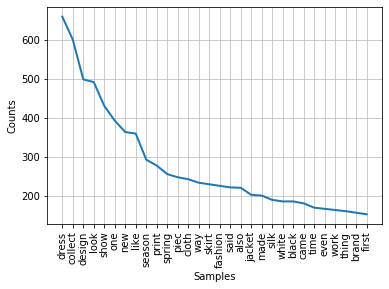

In [33]:
freq1.plot(30)

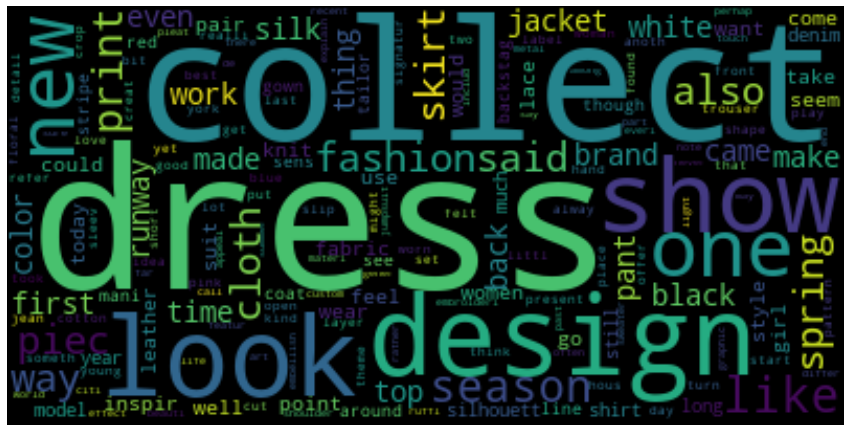

In [34]:
filter_words_2 = dict([(m, n) for m, n in freq1.items()])
 
wcloud = WordCloud().generate_from_frequencies(filter_words_2)
 
# Plotting the wordcloud
plt.figure(figsize=(15,8))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

## 3) Use POS approach and focus on all the noun forms (NN, NNP, NNS, NNPS)

In [35]:
#Generate a list of POS tags
POS_tags = nltk.pos_tag(tokens) #use unprocessed 'tokens', not 'words'
POS_tags

[('Detachment', 'NN'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('word', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('day', 'NN'),
 ('at', 'IN'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('(', '('),
 ('yes', 'UH'),
 (',', ','),
 ('like', 'IN'),
 ('the', 'DT'),
 ('labels', 'NNS'),
 ('name', 'NN'),
 (',', ','),
 ('bien', 'VB'),
 ('sr', 'NN'),
 (')', ')'),
 ('.', '.'),
 ('Designer', 'NNP'),
 ('Mona', 'NNP'),
 ('Kowalska', 'NNP'),
 ('loves', 'VBZ'),
 ('the', 'DT'),
 ('high', 'JJ'),
 ('concept', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('one', 'CD'),
 ('imagines', 'NNS'),
 ('that', 'WDT'),
 ('today', 'NN'),
 ('detachment', 'NN'),
 ('included', 'VBD'),
 ('being', 'VBG'),
 ('unconcerned', 'VBN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('gaze', 'NN'),
 ('of', 'IN'),
 ('others', 'NNS'),
 ('.', '.'),
 ('Kowalskas', 'NNP'),
 ('woman', 'NN'),
 (',', ','),
 ('both', 'CC'),
 ('as', 'IN'),
 ('she', 'PRP'),
 ('appears', 'VBZ'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('runway', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('real', 'JJ'),

In [36]:
#Keep tags that start with 'N'
POS_tag_listN = [(word,tag) for (word,tag) in POS_tags if tag.startswith('N')]

In [37]:
#Generate a frequency distribution 
tag_freq = nltk.FreqDist(POS_tag_listN)
sorted_tag_freq = sorted(tag_freq.items(), key = lambda k:k[1], reverse = True)
sorted_tag_freq

[(('collection', 'NN'), 480),
 (('dresses', 'NNS'), 302),
 (('dress', 'NN'), 270),
 (('show', 'NN'), 250),
 (('designer', 'NN'), 228),
 (('clothes', 'NNS'), 223),
 (('season', 'NN'), 219),
 (('pieces', 'NNS'), 196),
 (('way', 'NN'), 191),
 (('silk', 'NN'), 168),
 (('Spring', 'NN'), 165),
 (('fashion', 'NN'), 160),
 (('designers', 'NNS'), 150),
 (('looks', 'NNS'), 138),
 (('skirts', 'NNS'), 126),
 (('pants', 'NNS'), 125),
 (('runway', 'NN'), 123),
 (('time', 'NN'), 123),
 (('look', 'NN'), 117),
 (('brand', 'NN'), 110),
 (('prints', 'NNS'), 109),
 (('New', 'NNP'), 109),
 (('women', 'NNS'), 104),
 (('lace', 'NN'), 102),
 (('jacket', 'NN'), 101),
 (('skirt', 'NN'), 101),
 (('point', 'NN'), 100),
 (('jackets', 'NNS'), 100),
 (('collections', 'NNS'), 96),
 (('today', 'NN'), 93),
 (('leather', 'NN'), 92),
 (('sense', 'NN'), 90),
 (('denim', 'NN'), 90),
 (('print', 'NN'), 89),
 (('York', 'NNP'), 88),
 (('things', 'NNS'), 86),
 (('models', 'NNS'), 83),
 (('cotton', 'NN'), 82),
 (('color', 'NN')

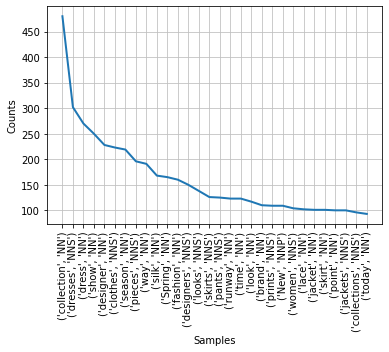

In [38]:
tag_freq.plot(30)

## 4) Use POS approach and only focus on NNP 

In [39]:
#Keep tags that start with 'N'
POS_tag_listNNP = [(word,tag) for (word,tag) in POS_tags if tag == 'NNP']
POS_tag_listNNP

[('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Designer', 'NNP'),
 ('Mona', 'NNP'),
 ('Kowalska', 'NNP'),
 ('Kowalskas', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Kowalska', 'NNP'),
 ('Pop', 'NNP'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Kawakubo-esque', 'NNP'),
 ('Kowalskas', 'NNP'),
 ('Spring', 'NNP'),
 ('A', 'NNP'),
 ('Dtacher', 'NNP'),
 ('Facult', 'NNP'),
 ('Mdecine', 'NNP'),
 ('Paris', 'NNP'),
 ('Descartes', 'NNP'),
 ('Triumphs', 'NNP'),
 ('Vandevorst', 'NNP'),
 ('East', 'NNP'),
 ('West', 'NNP'),
 ('Hence', 'NNP'),
 ('Chinese', 'NNP'),
 ('Chanel-meets-Mongolia', 'NNP'),
 ('Antwerp', 'NNP'),
 ('Vandevorst', 'NNP'),
 ('Road', 'NNP'),
 ('August', 'NNP'),
 ('A.L.C', 'NNP'),
 ('InterLuxe', 'NNP'),
 ('Jason', 'NNP'),
 ('Wu', 'NNP'),
 ('Andrea', 'NNP'),
 ('Lieberman', 'NNP'),
 ('Berber', 'NNP'),
 ('Lieberman', 'NNP'),
 ('A.L.C', 'NNP'),
 ('Lieberman', 'NNP'),
 ('A-line', 'NNP'),
 ('Lieberman', 'NNP'),
 ('A.L.C', 'NNP'),
 ('Jean', 'NNP'),
 ('Touitou', 'NNP'),
 ('APC', 'NNP'),
 ('Kingliness', 'NNP'),
 ('Tou

In [40]:
#Generate a frequency distribution 
tag_freq_2 = nltk.FreqDist(POS_tag_listNNP)
sorted_tag_freq_2 = sorted(tag_freq_2.items(), key = lambda k:k[1], reverse = True)
sorted_tag_freq_2

[(('New', 'NNP'), 109),
 (('York', 'NNP'), 88),
 (('Spring', 'NNP'), 44),
 (('London', 'NNP'), 43),
 (('Paris', 'NNP'), 37),
 (('Fashion', 'NNP'), 36),
 (('West', 'NNP'), 25),
 (('City', 'NNP'), 22),
 (('Wang', 'NNP'), 20),
 (('Week', 'NNP'), 19),
 (('Fall', 'NNP'), 19),
 (('Im', 'NNP'), 19),
 (('Lee', 'NNP'), 19),
 (('T-shirt', 'NNP'), 18),
 (('Milan', 'NNP'), 18),
 (('Saint', 'NNP'), 17),
 (('Instagram', 'NNP'), 17),
 (('A', 'NNP'), 16),
 (('Japan', 'NNP'), 16),
 (('Johnson', 'NNP'), 16),
 (('East', 'NNP'), 15),
 (('Resort', 'NNP'), 15),
 (('Versace', 'NNP'), 15),
 (('A-line', 'NNP'), 14),
 (('Art', 'NNP'), 14),
 (('David', 'NNP'), 13),
 (('DKNY', 'NNP'), 13),
 (('Anderson', 'NNP'), 13),
 (('Which', 'NNP'), 12),
 (('Chanel', 'NNP'), 12),
 (('English', 'NNP'), 12),
 (('Kate', 'NNP'), 12),
 (('Chlo', 'NNP'), 12),
 (('Italy', 'NNP'), 12),
 (('Gucci', 'NNP'), 12),
 (('Chow', 'NNP'), 12),
 (('Christopher', 'NNP'), 12),
 (('Van', 'NNP'), 12),
 (('Smith', 'NNP'), 12),
 (('John', 'NNP'), 11)

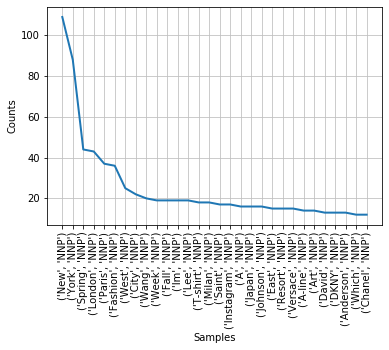

In [41]:
tag_freq_2.plot(30)

## 5) BI-GRAMS

In [43]:
from nltk.util import ngrams

In [49]:
bigrams=list(ngrams(stem1,2))
print(len(bigrams))
bigrams

67866


[('detach', 'word'),
 ('word', 'day'),
 ('day', 'dtacher'),
 ('dtacher', 'ye'),
 ('ye', 'like'),
 ('like', 'label'),
 ('label', 'name'),
 ('name', 'bien'),
 ('bien', 'sr'),
 ('sr', 'design'),
 ('design', 'mona'),
 ('mona', 'kowalska'),
 ('kowalska', 'love'),
 ('love', 'high'),
 ('high', 'concept'),
 ('concept', 'one'),
 ('one', 'imagin'),
 ('imagin', 'today'),
 ('today', 'detach'),
 ('detach', 'includ'),
 ('includ', 'unconcern'),
 ('unconcern', 'gaze'),
 ('gaze', 'other'),
 ('other', 'kowalska'),
 ('kowalska', 'woman'),
 ('woman', 'appear'),
 ('appear', 'runway'),
 ('runway', 'real'),
 ('real', 'world'),
 ('world', 'dress'),
 ('dress', 'intens'),
 ('intens', 'arti'),
 ('arti', 'bend'),
 ('bend', 'tast'),
 ('tast', 'cloth'),
 ('cloth', 'match'),
 ('match', 'make'),
 ('make', 'dtacher'),
 ('dtacher', 'cultishli'),
 ('cultishli', 'belov'),
 ('belov', 'brand'),
 ('brand', 'among'),
 ('among', 'certain'),
 ('certain', 'shopper'),
 ('shopper', 'season'),
 ('season', 'kowalska'),
 ('kowalska'

In [52]:
#Generate a frequency distribution 
freq3 = nltk.FreqDist(bigrams)
sorted_tag_freq_3 = sorted(freq3.items(), key = lambda k:k[1], reverse = True)
sorted_tag_freq_3

[(('new', 'york'), 89),
 (('spring', 'collect'), 53),
 (('slip', 'dress'), 42),
 (('look', 'like'), 35),
 (('red', 'carpet'), 32),
 (('front', 'row'), 28),
 (('creativ', 'director'), 26),
 (('new', 'collect'), 24),
 (('york', 'citi'), 24),
 (('silk', 'dress'), 21),
 (('fashion', 'week'), 21),
 (('last', 'season'), 21),
 (('piec', 'like'), 20),
 (('spring', 'show'), 20),
 (('start', 'point'), 19),
 (('latest', 'collect'), 18),
 (('young', 'design'), 18),
 (('black', 'white'), 17),
 (('floral', 'print'), 16),
 (('maxi', 'dress'), 15),
 (('broderi', 'anglais'), 15),
 (('fil', 'coup'), 15),
 (('show', 'today'), 15),
 (('said', 'backstag'), 14),
 (('color', 'palett'), 14),
 (('biker', 'jacket'), 13),
 (('fashion', 'show'), 13),
 (('skirt', 'dress'), 13),
 (('point', 'view'), 13),
 (('knit', 'dress'), 13),
 (('backstag', 'show'), 13),
 (('first', 'time'), 13),
 (('de', 'la'), 13),
 (('black', 'dress'), 12),
 (('crop', 'top'), 12),
 (('feel', 'like'), 12),
 (('show', 'note'), 12),
 (('york', 

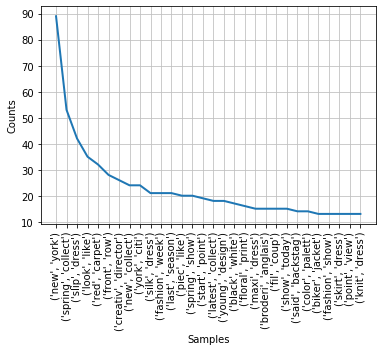

In [53]:
freq3.plot(30)

## 6) TRI-GRAMS

In [56]:
trigrams=list(ngrams(stem1,3))
print(len(trigrams))
trigrams

67865


[('detach', 'word', 'day'),
 ('word', 'day', 'dtacher'),
 ('day', 'dtacher', 'ye'),
 ('dtacher', 'ye', 'like'),
 ('ye', 'like', 'label'),
 ('like', 'label', 'name'),
 ('label', 'name', 'bien'),
 ('name', 'bien', 'sr'),
 ('bien', 'sr', 'design'),
 ('sr', 'design', 'mona'),
 ('design', 'mona', 'kowalska'),
 ('mona', 'kowalska', 'love'),
 ('kowalska', 'love', 'high'),
 ('love', 'high', 'concept'),
 ('high', 'concept', 'one'),
 ('concept', 'one', 'imagin'),
 ('one', 'imagin', 'today'),
 ('imagin', 'today', 'detach'),
 ('today', 'detach', 'includ'),
 ('detach', 'includ', 'unconcern'),
 ('includ', 'unconcern', 'gaze'),
 ('unconcern', 'gaze', 'other'),
 ('gaze', 'other', 'kowalska'),
 ('other', 'kowalska', 'woman'),
 ('kowalska', 'woman', 'appear'),
 ('woman', 'appear', 'runway'),
 ('appear', 'runway', 'real'),
 ('runway', 'real', 'world'),
 ('real', 'world', 'dress'),
 ('world', 'dress', 'intens'),
 ('dress', 'intens', 'arti'),
 ('intens', 'arti', 'bend'),
 ('arti', 'bend', 'tast'),
 ('bend'

In [57]:
#Generate a frequency distribution 
freq4 = nltk.FreqDist(trigrams)
sorted_tag_freq_4= sorted(freq4.items(), key = lambda k:k[1], reverse = True)
sorted_tag_freq_4

[(('new', 'york', 'citi'), 24),
 (('new', 'york', 'fashion'), 12),
 (('york', 'fashion', 'week'), 8),
 (('sat', 'front', 'row'), 7),
 (('silk', 'slip', 'dress'), 7),
 (('joie', 'de', 'vivr'), 7),
 (('de', 'la', 'morena'), 7),
 (('de', 'la', 'renta'), 6),
 (('barney', 'new', 'york'), 5),
 (('rock', 'n', 'roll'), 5),
 (('central', 'saint', 'martin'), 5),
 (('know', 'way', 'around'), 5),
 (('girl', 'want', 'wear'), 4),
 (('new', 'york', 'show'), 4),
 (('world', 'war', 'ii'), 4),
 (('sit', 'front', 'row'), 4),
 (('spring', 'show', 'today'), 4),
 (('oscar', 'de', 'la'), 4),
 (('littl', 'black', 'dress'), 3),
 (('pair', 'hot', 'pant'), 3),
 (('overs', 'biker', 'jacket'), 3),
 (('would', 'nice', 'see'), 3),
 (('calvin', 'klein', 'collect'), 3),
 (('fashion', 'fund', 'finalist'), 3),
 (('new', 'york', 'design'), 3),
 (('spring', 'collect', 'call'), 3),
 (('cant', 'help', 'wonder'), 3),
 (('took', 'center', 'stage'), 3),
 (('explain', 'backstag', 'show'), 3),
 (('collect', 'slip', 'dress'), 3),

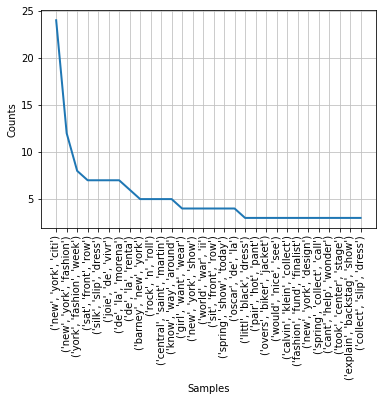

In [58]:
freq4.plot(30)